In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import classification_report, accuracy_score
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (12,8)
%matplotlib inline

In [2]:
data = pd.read_csv(r"D:\ExcelR Assignments\Question\KNN\KNN\Zoo.csv")

In [3]:
data

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [4]:
data.duplicated().sum()

0

In [5]:
data.isna().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

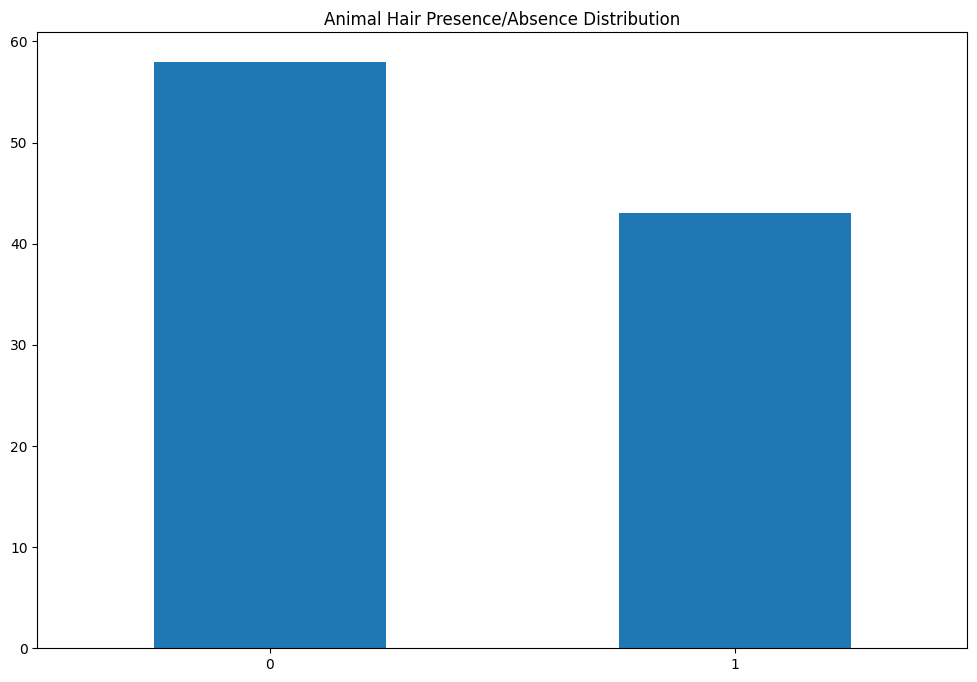

In [6]:
data['hair'].value_counts().plot(kind = 'bar')
plt.title("Animal Hair Presence/Absence Distribution")
plt.xticks(rotation = 0);

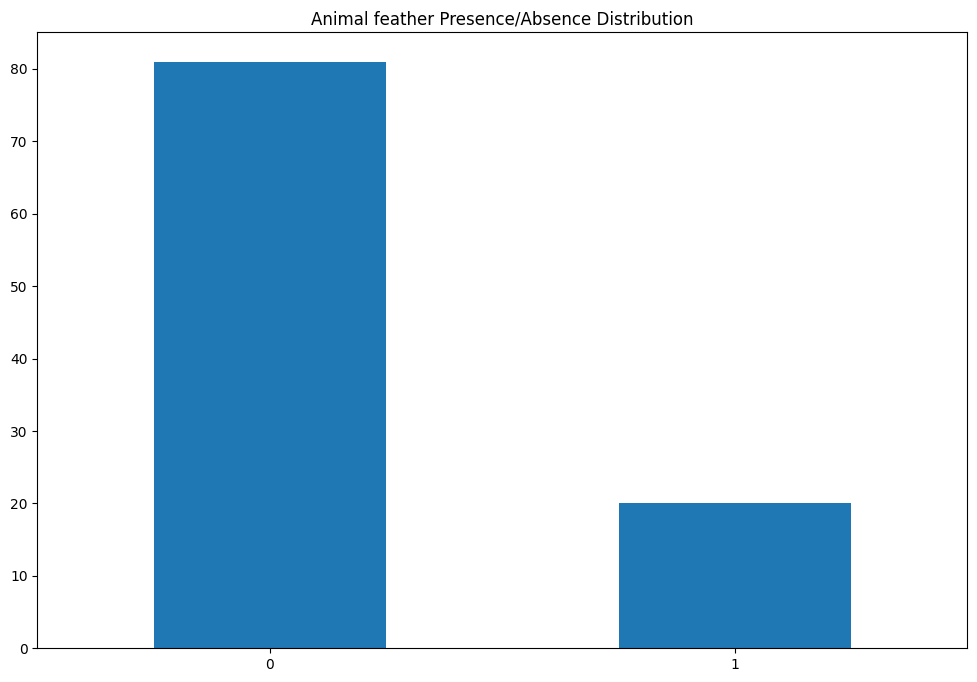

In [7]:
data['feathers'].value_counts().plot(kind = 'bar')
plt.title("Animal feather Presence/Absence Distribution")
plt.xticks(rotation = 0);

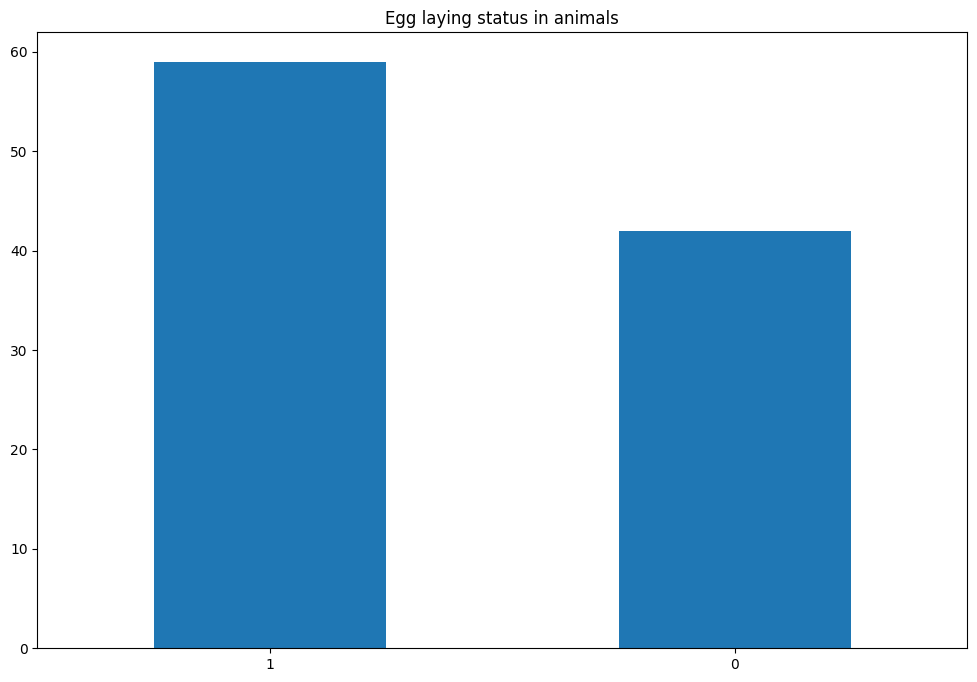

In [8]:
data['eggs'].value_counts().plot(kind = 'bar')
plt.title("Egg laying status in animals")
plt.xticks(rotation = 0);

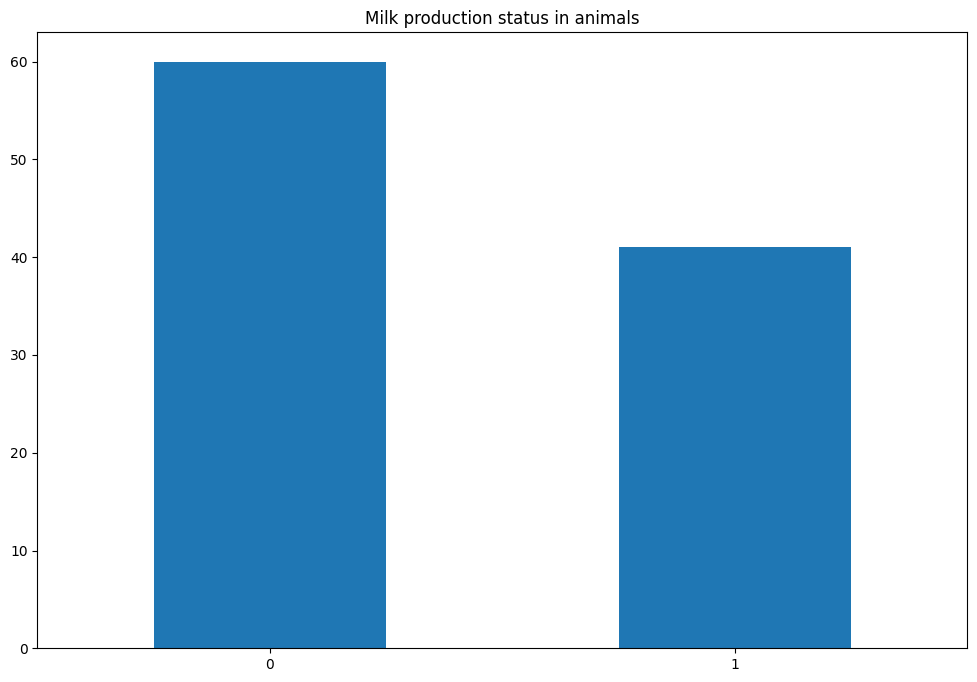

In [9]:
data['milk'].value_counts().plot(kind = 'bar')
plt.title("Milk production status in animals")
plt.xticks(rotation = 0);

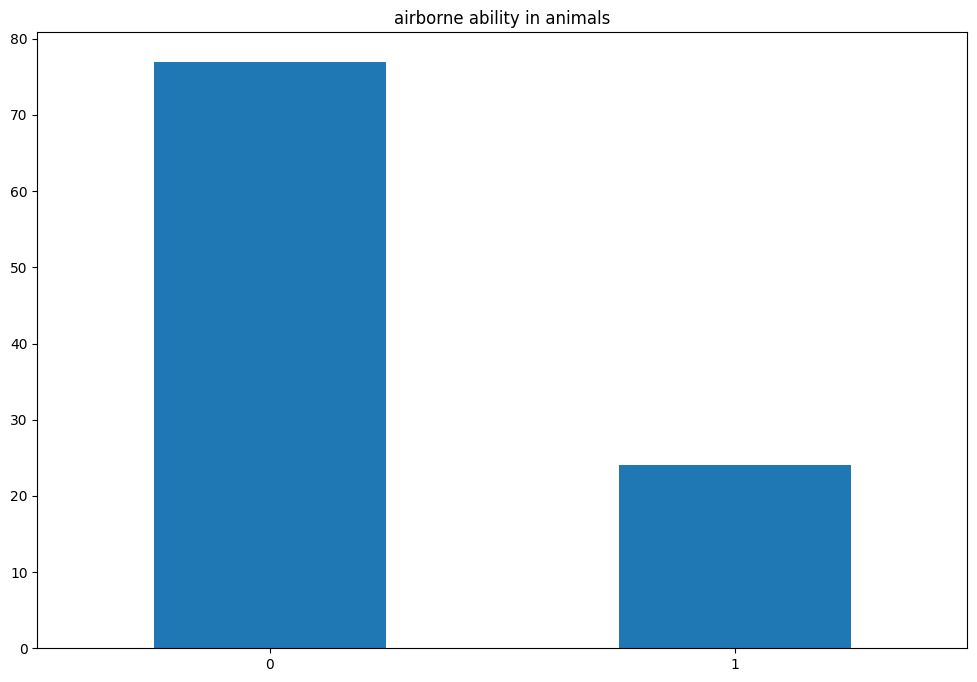

In [10]:
data['airborne'].value_counts().plot(kind = 'bar')
plt.title("airborne ability in animals")
plt.xticks(rotation = 0);

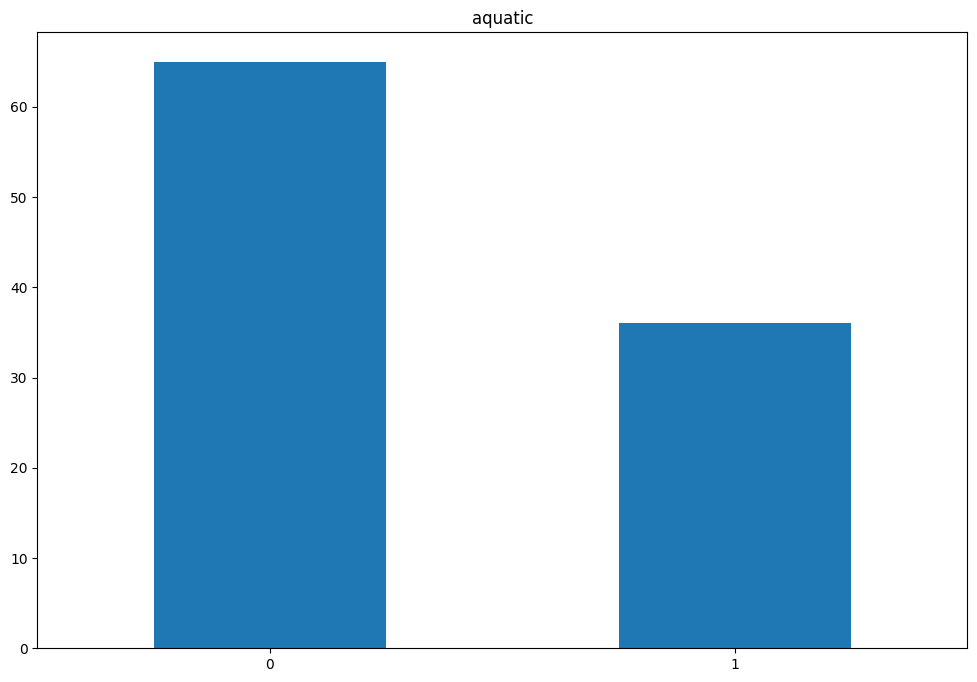

In [11]:
data['aquatic'].value_counts().plot(kind = 'bar')
plt.title("aquatic")
plt.xticks(rotation = 0);

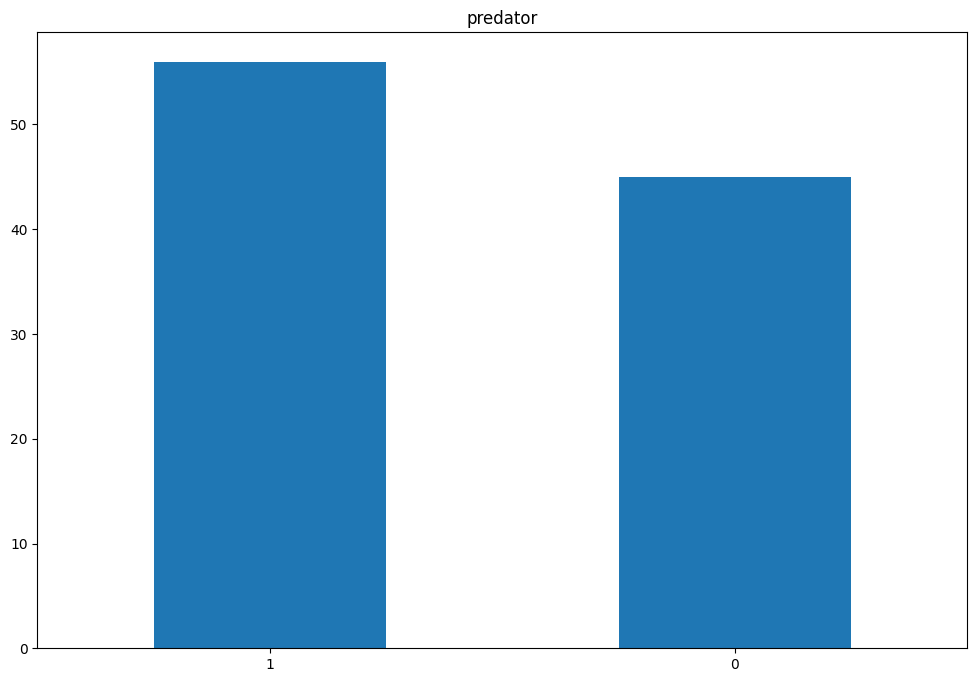

In [12]:
data['predator'].value_counts().plot(kind = 'bar')
plt.title("predator")
plt.xticks(rotation = 0);

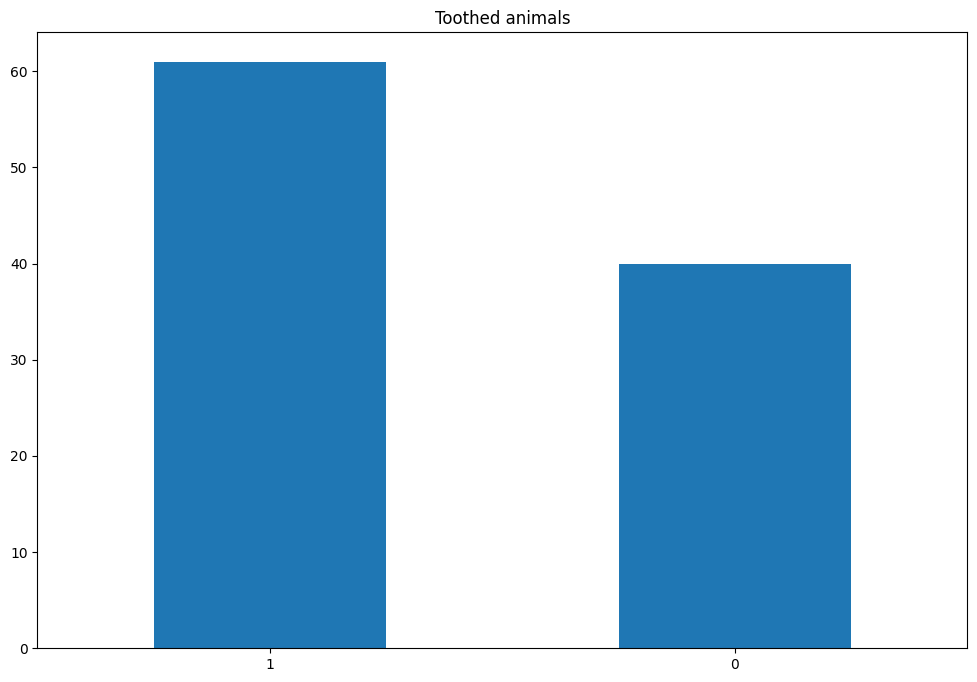

In [13]:
data['toothed'].value_counts().plot(kind = 'bar')
plt.title("Toothed animals")
plt.xticks(rotation = 0);

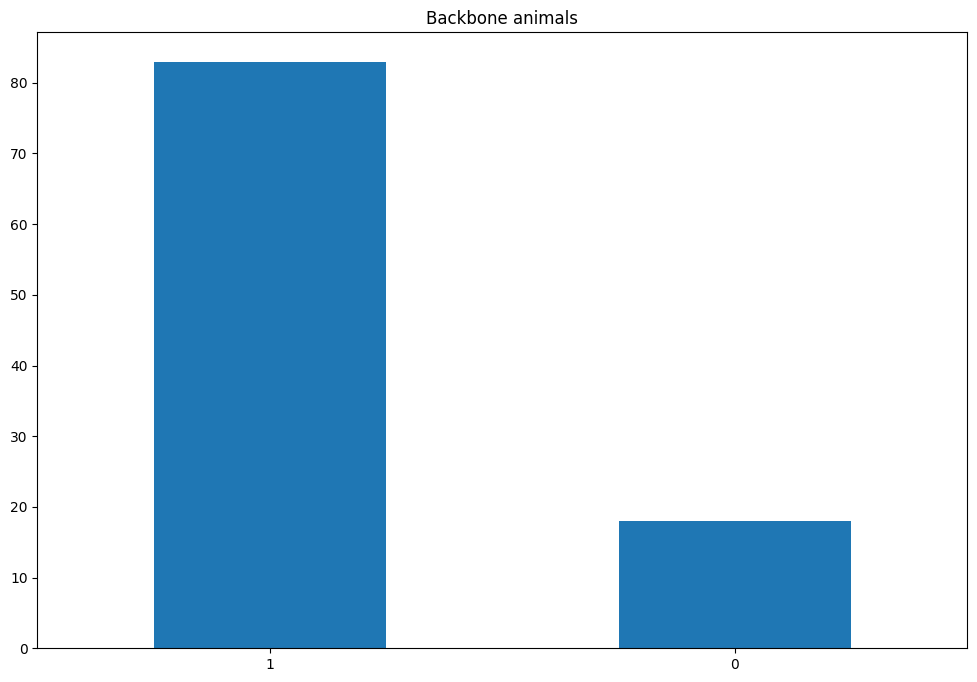

In [14]:
data['backbone'].value_counts().plot(kind = 'bar')
plt.title("Backbone animals")
plt.xticks(rotation = 0);

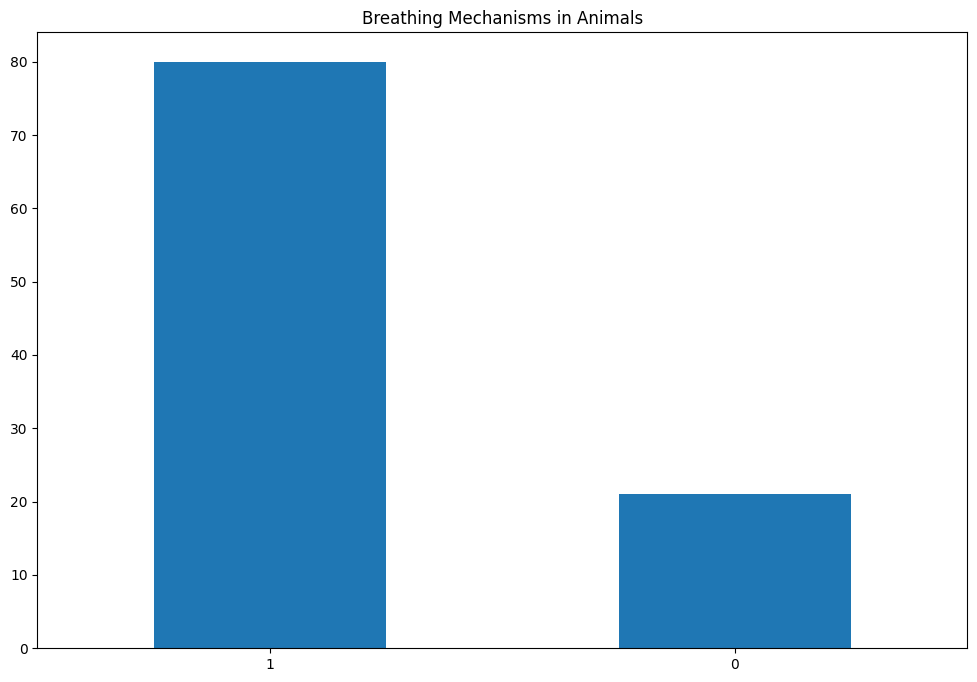

In [15]:
data['breathes'].value_counts().plot(kind = 'bar')
plt.title("Breathing Mechanisms in Animals")
plt.xticks(rotation = 0);

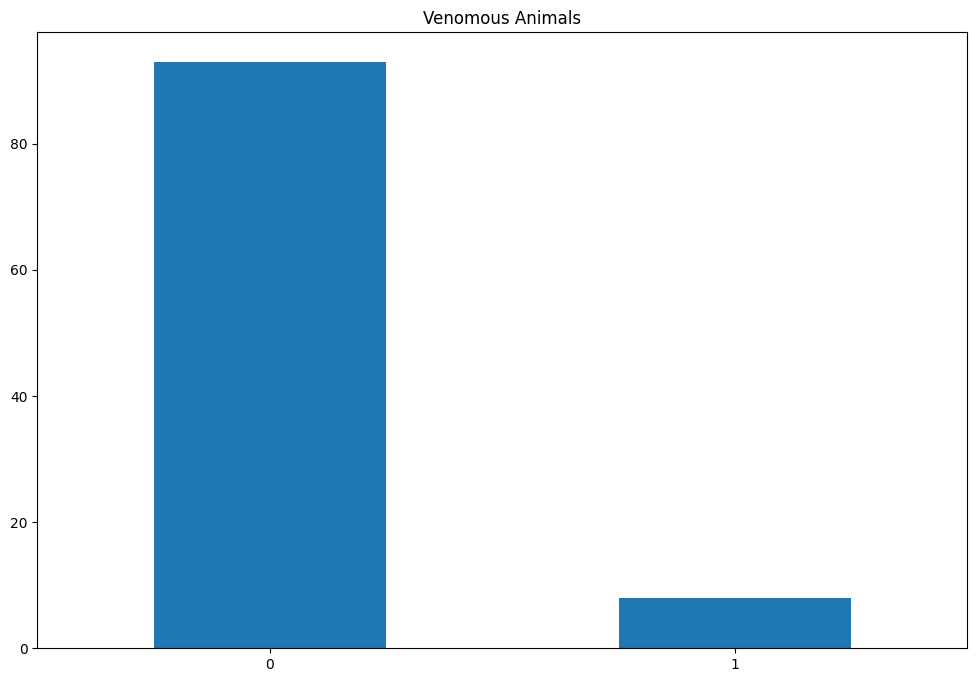

In [16]:
data['venomous'].value_counts().plot(kind = 'bar')
plt.title("Venomous Animals")
plt.xticks(rotation = 0);

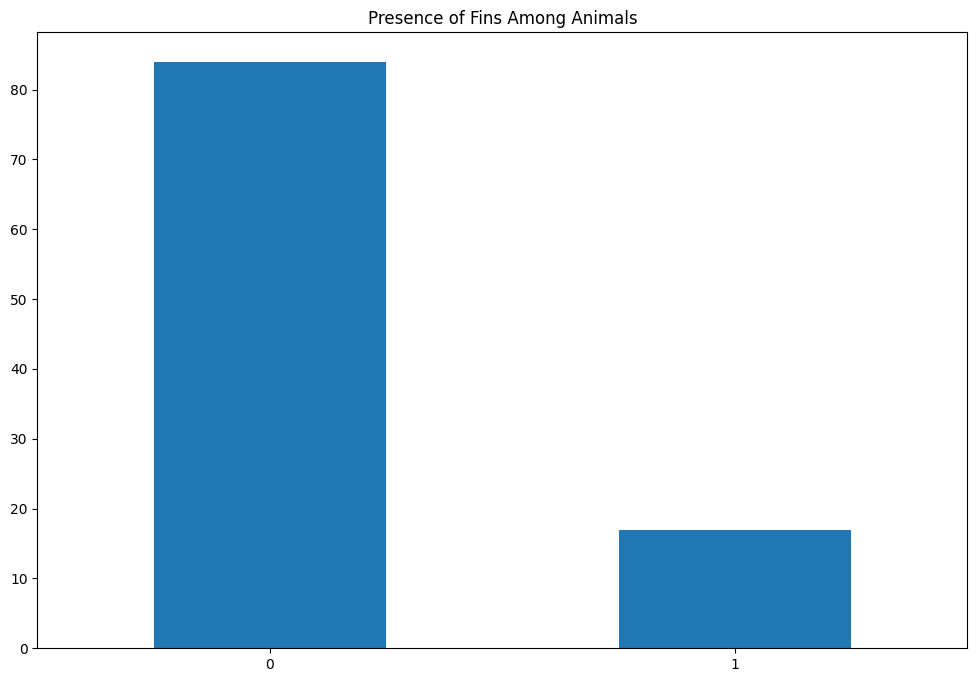

In [17]:
data['fins'].value_counts().plot(kind = 'bar')
plt.title("Presence of Fins Among Animals")
plt.xticks(rotation = 0);

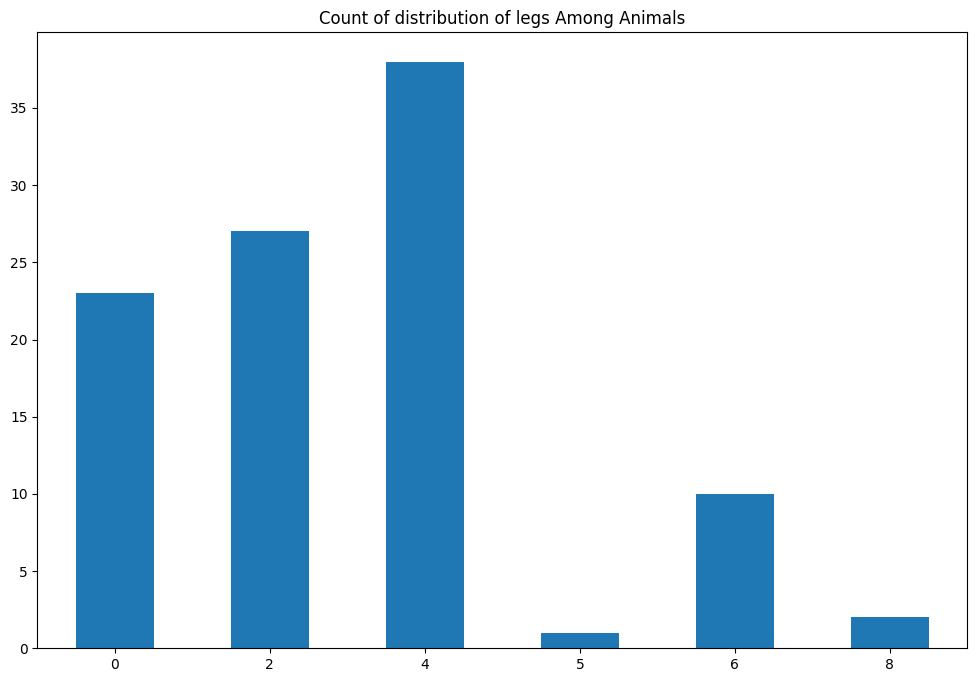

In [18]:
data['legs'].value_counts().sort_index().plot(kind = 'bar')
plt.title("Count of distribution of legs Among Animals")
plt.xticks(rotation = 0);

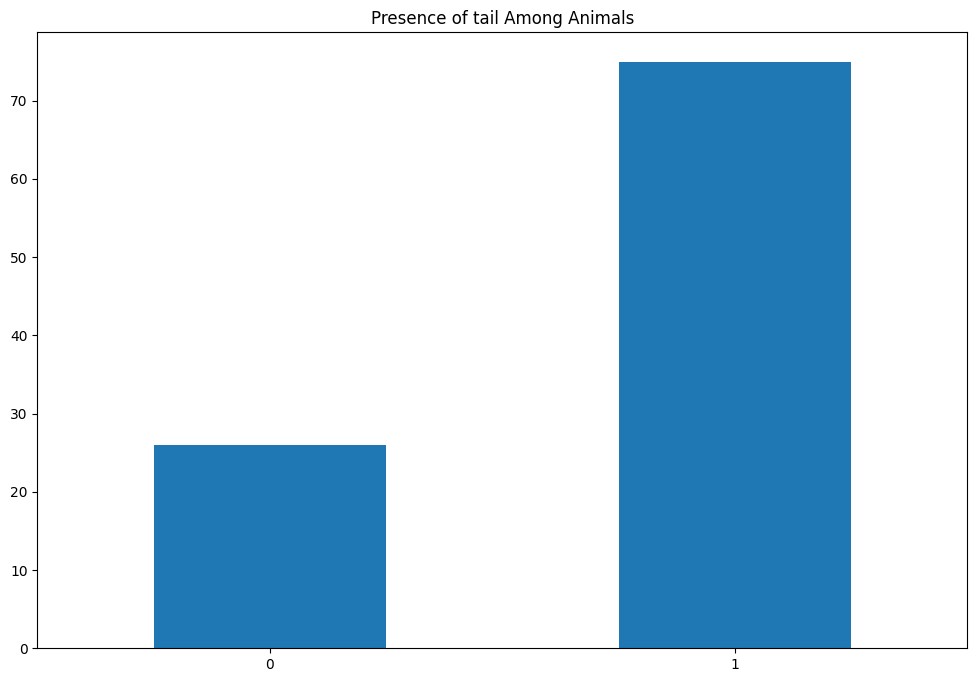

In [19]:
data['tail'].value_counts().sort_index().plot(kind = 'bar')
plt.title("Presence of tail Among Animals")
plt.xticks(rotation = 0);

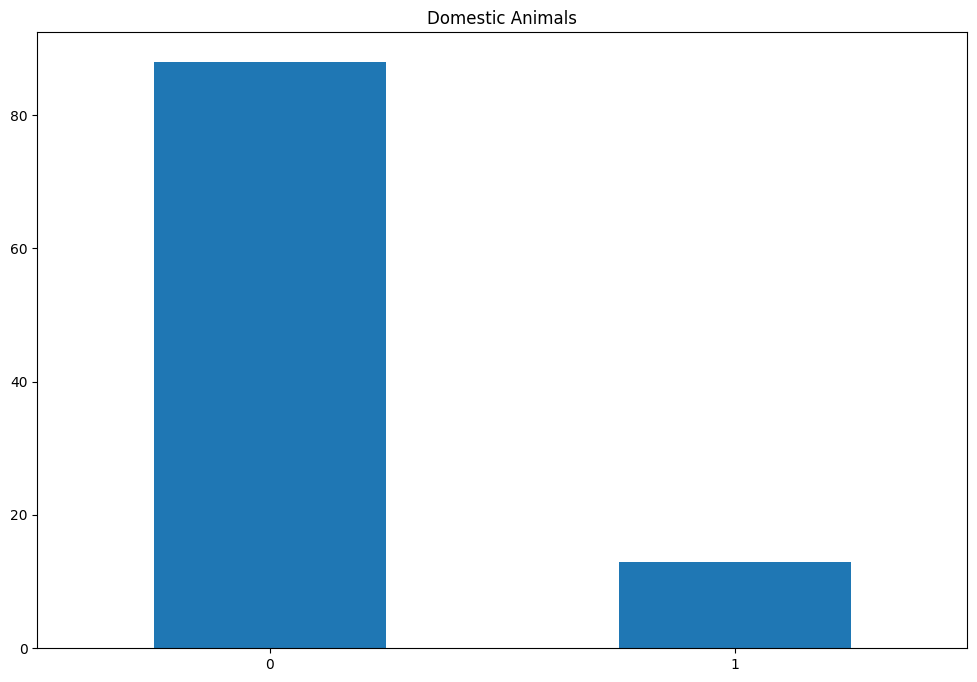

In [20]:
data['domestic'].value_counts().sort_index().plot(kind = 'bar')
plt.title("Domestic Animals")
plt.xticks(rotation = 0);

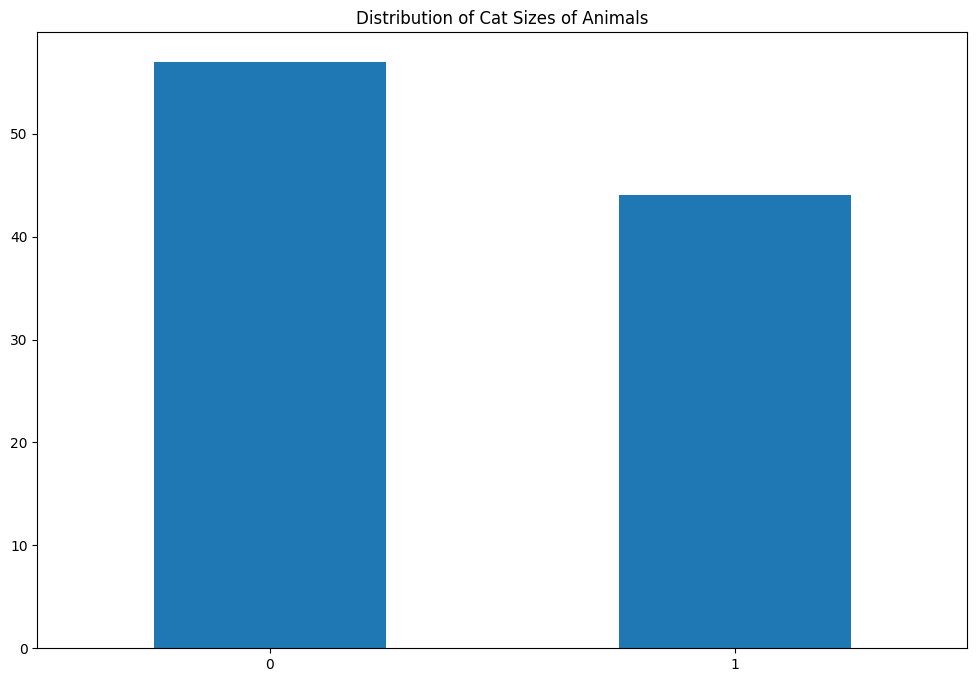

In [21]:
data['catsize'].value_counts().sort_index().plot(kind = 'bar')
plt.title("Distribution of Cat Sizes of Animals")
plt.xticks(rotation = 0);

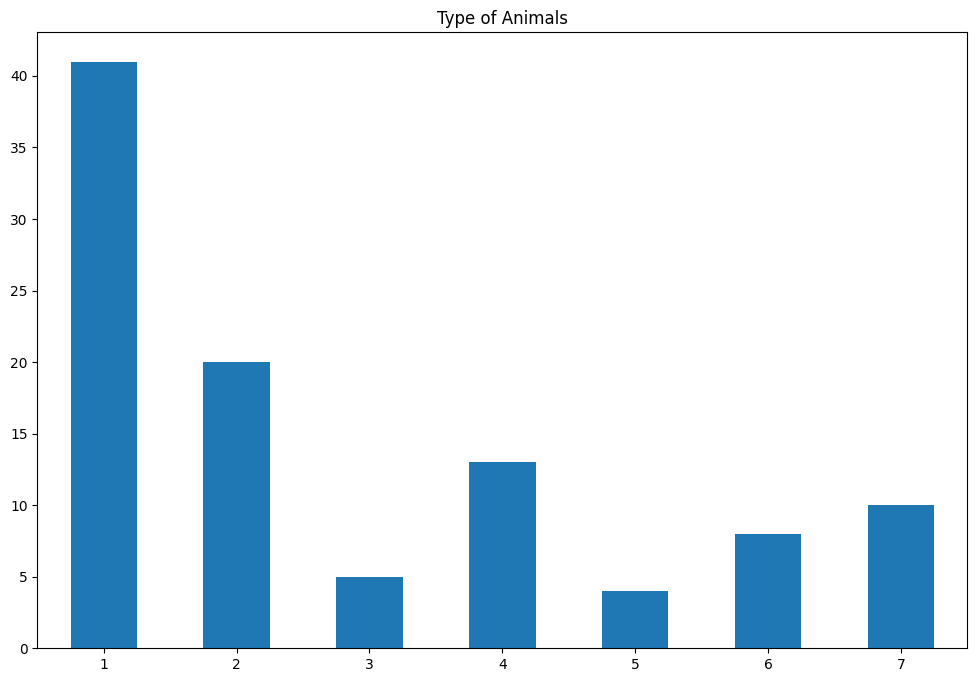

In [22]:
data['type'].value_counts().sort_index().plot(kind = 'bar')
plt.title("Type of Animals")
plt.xticks(rotation = 0);

<Axes: >

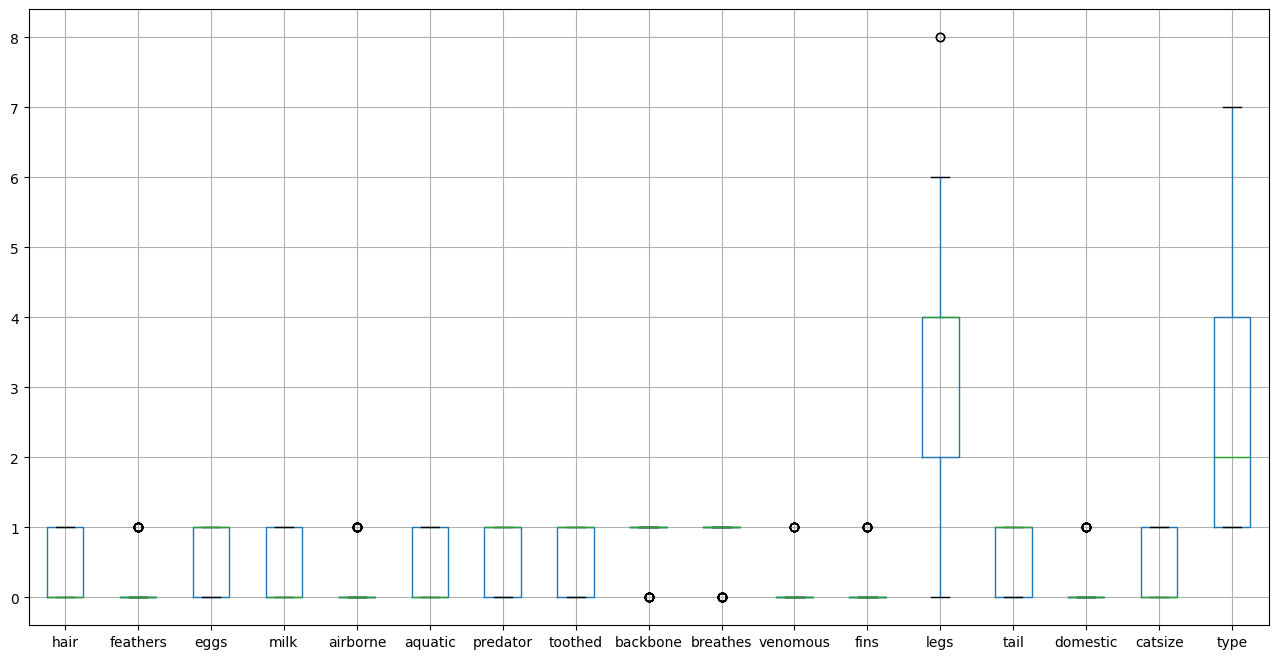

In [23]:
plt.figure(figsize = (16,8))
data.boxplot()

In [24]:
mimx = MinMaxScaler()
numeric_columns = data.drop(['animal name', 'type'], axis=1).select_dtypes(include=['number']).columns
data[numeric_columns] = mimx.fit_transform(data[numeric_columns])

In [25]:
x = data.drop(['animal name', 'type'], axis = 1)
y = data[['type']]

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, shuffle = True, random_state = 42)

In [27]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [28]:
y_pred = knn.predict(x_test)

In [29]:
print(f'Training Accuracy: {knn.score(x_train, y_train)}')
print(f'Testing Accuracy: {knn.score(x_test, y_test)}')

Training Accuracy: 0.975
Testing Accuracy: 0.9523809523809523


In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         1
           4       0.67      1.00      0.80         2
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1

    accuracy                           0.95        21
   macro avg       0.78      0.83      0.80        21
weighted avg       0.92      0.95      0.93        21



In [38]:
X = data.drop('animal name', axis = 1)

In [39]:
X

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.50,0.0,0.0,1.0,1
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.50,1.0,0.0,1.0,1
2,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.00,1.0,0.0,0.0,4
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.50,0.0,0.0,1.0,1
4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.50,1.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.25,1.0,0.0,1.0,1
97,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.75,0.0,0.0,0.0,6
98,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.50,1.0,0.0,1.0,1
99,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.00,0.0,0.0,0.0,7


In [41]:
# We need pca for visualization because more than 3 dimensions cannot be visualized.
pca = PCA(n_components = 2) 
X_pca = pca.fit_transform(X)

In [45]:
knn_pca = KNeighborsClassifier(n_neighbors = 5) 
knn_pca.fit(X_pca, y)

KNeighborsClassifier()

In [51]:
y = y.values.flatten()  # Converting from dataframe to 1d array

<Axes: >

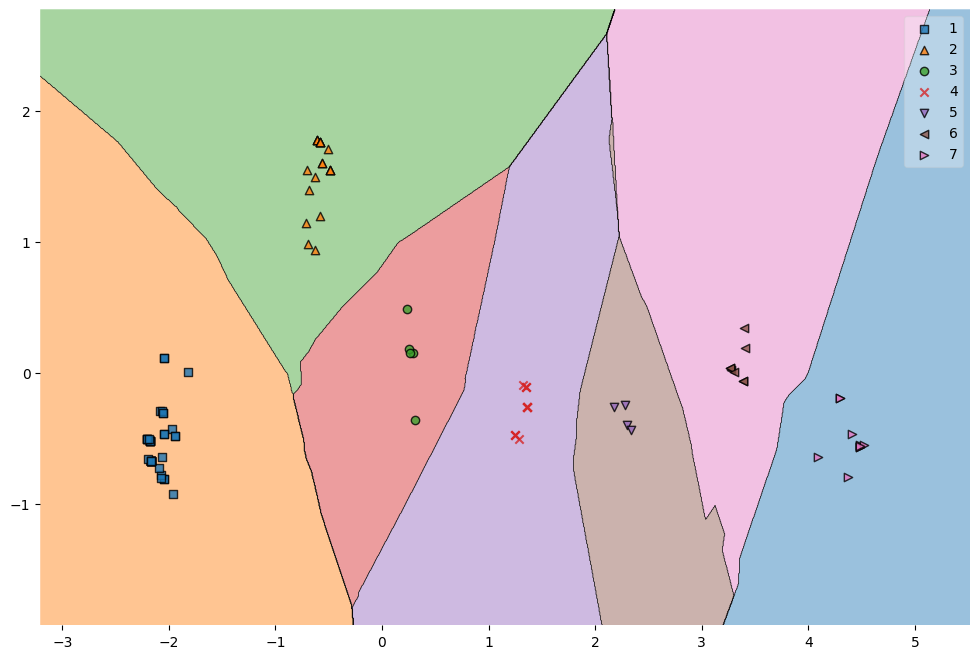

In [57]:
plot_decision_regions(X_pca, y, clf=knn_pca) # Visualizing the decision boundary

### Interview Questions